# WeatherPy

In [1]:
#import dependencies, setup, and other necessary items
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from config import openweather_apikey
from citipy import citipy
import json

#range for latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [2]:
#lists to hold city data and latitude/longitude data
lat_lngs = []
cities = []


#finding random latitudes and longitudes, then putting them together
lats = np.random.uniform(lat_range[0], lat_range[1], size=1700)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1700)
lat_lngs = list(zip(lats, lngs))

#finding the closest city to each lat/lng pair
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #add city to list (if not there already)
    if city not in cities:
        cities.append(city)

#make sure there are enought cities (500+ to ensure at least 500 are found)
print(f"Number of cities in list: {len(cities)}")
    

Number of cities in list: 656


# Perform API Calls

In [3]:
#create a counter variable
count = 0

#create a dictionary to hold json results
city_weather_results = {}

#signal the start of data retrieval
print("Beginning Data Retrieval")
print("------------------------------")
#creating a try loop in case the city doesn't exist in the api
try:
    #looping through cities in the cities list
    for city in cities:
        #using city name to search for cities
        city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={openweather_apikey}"
        #call api and convert to json
        city_json = requests.get(city_url).json()
        #make the json pretty
        pretty_city = json.dumps(city_json)
        #print the log
        print(f"Processing Record {count + 1} | {city}")
        #append dictionary response to dictionary with a key of the count number
        city_weather_results[city] = json.loads(pretty_city)
        #add one to the count
        count += 1
        #pause call to not exceed call limit (60 per minute)
        time.sleep(15)
except KeyError:
    #print error message
    print("City not found. Skipping...")
    
#signal the end of data retrieval
print("Data Retrieval Complete")

Beginning Data Retrieval
------------------------------
Processing Record 1 | saleaula
Processing Record 2 | illoqqortoormiut
Processing Record 3 | devonport
Processing Record 4 | katsuura
Processing Record 5 | cape town
Processing Record 6 | busselton
Processing Record 7 | arraial do cabo
Processing Record 8 | punta arenas
Processing Record 9 | camargo
Processing Record 10 | mataura
Processing Record 11 | nikolskoye
Processing Record 12 | padang
Processing Record 13 | shahrud
Processing Record 14 | klaksvik
Processing Record 15 | san antonio
Processing Record 16 | westport
Processing Record 17 | jamestown
Processing Record 18 | east london
Processing Record 19 | leningradskiy
Processing Record 20 | galbshtadt
Processing Record 21 | kuito
Processing Record 22 | pacific grove
Processing Record 23 | palembang
Processing Record 24 | am timan
Processing Record 25 | aden
Processing Record 26 | esperance
Processing Record 27 | saint-philippe
Processing Record 28 | paamiut
Processing Record 2

Processing Record 248 | artyom
Processing Record 249 | pevek
Processing Record 250 | hibbing
Processing Record 251 | foindu
Processing Record 252 | pisco
Processing Record 253 | satitoa
Processing Record 254 | ostrovnoy
Processing Record 255 | ha tinh
Processing Record 256 | cam pha
Processing Record 257 | sisimiut
Processing Record 258 | tabiauea
Processing Record 259 | airai
Processing Record 260 | praia da vitoria
Processing Record 261 | khorixas
Processing Record 262 | ternate
Processing Record 263 | sioux lookout
Processing Record 264 | segezha
Processing Record 265 | carbonia
Processing Record 266 | lysyye gory
Processing Record 267 | puerto baquerizo moreno
Processing Record 268 | santa rosalia
Processing Record 269 | uruzgan
Processing Record 270 | egvekinot
Processing Record 271 | aboso
Processing Record 272 | cuiluan
Processing Record 273 | tilichiki
Processing Record 274 | sitka
Processing Record 275 | tatvan
Processing Record 276 | san vicente
Processing Record 277 | catuda

Processing Record 496 | awka
Processing Record 497 | kutiyana
Processing Record 498 | mufumbwe
Processing Record 499 | ornskoldsvik
Processing Record 500 | kuytun
Processing Record 501 | xining
Processing Record 502 | talaya
Processing Record 503 | harper
Processing Record 504 | chute-aux-outardes
Processing Record 505 | benguela
Processing Record 506 | russell
Processing Record 507 | port moresby
Processing Record 508 | sedro-woolley
Processing Record 509 | batagay-alyta
Processing Record 510 | ruatoria
Processing Record 511 | caravelas
Processing Record 512 | san buenaventura
Processing Record 513 | san andres
Processing Record 514 | souillac
Processing Record 515 | le port
Processing Record 516 | aklavik
Processing Record 517 | inongo
Processing Record 518 | bambanglipuro
Processing Record 519 | annau
Processing Record 520 | dana point
Processing Record 521 | mogadishu
Processing Record 522 | louisbourg
Processing Record 523 | namie
Processing Record 524 | general cepeda
Processing 

In [19]:
#create dataframe from results
city_weather_df = pd.DataFrame.from_dict(city_weather_results)
#export data frame to csv
city_weather_df.to_csv("output_data/cities.csv")

city_weather_df.head()

,saleaula,illoqqortoormiut,devonport,katsuura,cape town,busselton,arraial do cabo,punta arenas,camargo,mataura,...,port hedland,bikin,lubao,grants,juegang,chatham,kyaukse,north bend,fort nelson,vestmanna
cod,404,404,200,200,200,200,200,200,200,200,...,200,200,200,200,200,200,200,200,200,200
message,city not found,city not found,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
coord,NaN,NaN,"{'lon': 146.35, 'lat': -41.1667}","{'lon': 140.3, 'lat': 35.1333}","{'lon': 18.4232, 'lat': -33.9258}","{'lon': 115.3333, 'lat': -33.65}","{'lon': -42.0278, 'lat': -22.9661}","{'lon': -70.9167, 'lat': -53.15}","{'lon': -105.1667, 'lat': 27.6667}","{'lon': 168.8643, 'lat': -46.1927}",...,"{'lon': 118.5667, 'lat': -20.3167}","{'lon': 134.26, 'lat': 46.8161}","{'lon': 120.55, 'lat': 14.9167}","{'lon': -107.8514, 'lat': 35.1473}","{'lon': 121.1855, 'lat': 32.3174}","{'lon': 0.5279, 'lat': 51.3789}","{'lon': 96.1333, 'lat': 21.6}","{'lon': -124.2243, 'lat': 43.4065}","{'lon': -122.7002, 'lat': 58.8053}","{'lon': -7.1664, 'lat': 62.1564}"
weather,NaN,NaN,"[{'id': 804, 'main': 'Clouds', 'description': ...","[{'id': 803, 'main': 'Clouds', 'description': ...","[{'id': 800, 'main': 'Clear', 'description': '...","[{'id': 804, 'main': 'Clouds', 'description': ...","[{'id': 801, 'main': 'Clouds', 'description': ...","[{'id': 802, 'main': 'Clouds', 'description': ...","[{'id': 800, 'main': 'Clear', 'description': '...","[{'id': 804, 'main': 'Clouds', 'description': ...",...,"[{'id': 804, 'main': 'Clouds', 'description': ...","[{'id': 802, 'main': 'Clouds', 'description': ...","[{'id': 803, 'main': 'Clouds', 'description': ...","[{'id': 800, 'main': 'Clear', 'description': '...","[{'id': 500, 'main': 'Rain', 'description': 'l...","[{'id': 801, 'main': 'Clouds', 'description': ...","[{'id': 804, 'main': 'Clouds', 'description': ...","[{'id': 800, 'main': 'Clear', 'description': '...","[{'id': 801, 'main': 'Clouds', 'description': ...","[{'id': 803, 'main': 'Clouds', 'description': ..."
base,NaN,NaN,stations,stations,stations,stations,stations,stations,stations,stations,...,stations,stations,stations,stations,stations,stations,stations,stations,stations,stations


In [25]:
#cleaning the dataframe
#dropping the unnecessary message row
cleaned_city_weather_df = city_weather_df.drop(city_weather_df.index[1])
#dropping the rain and snow rows (unnecessary)
cleaned_city_weather_df = cleaned_city_weather_df[:-2]
#dropping columns that had NaN values
cleaned_city_weather_df = cleaned_city_weather_df.dropna(axis=1)
#remove the unnecessary cod row
cleaned_city_weather_df = cleaned_city_weather_df.drop(cleaned_city_weather_df.index[0])

cleaned_city_weather_df

,devonport,katsuura,cape town,busselton,arraial do cabo,punta arenas,camargo,mataura,nikolskoye,padang,...,port hedland,bikin,lubao,grants,juegang,chatham,kyaukse,north bend,fort nelson,vestmanna
coord,"{'lon': 146.35, 'lat': -41.1667}","{'lon': 140.3, 'lat': 35.1333}","{'lon': 18.4232, 'lat': -33.9258}","{'lon': 115.3333, 'lat': -33.65}","{'lon': -42.0278, 'lat': -22.9661}","{'lon': -70.9167, 'lat': -53.15}","{'lon': -105.1667, 'lat': 27.6667}","{'lon': 168.8643, 'lat': -46.1927}","{'lon': 30.7861, 'lat': 59.7035}","{'lon': 100.3543, 'lat': -0.9492}",...,"{'lon': 118.5667, 'lat': -20.3167}","{'lon': 134.26, 'lat': 46.8161}","{'lon': 120.55, 'lat': 14.9167}","{'lon': -107.8514, 'lat': 35.1473}","{'lon': 121.1855, 'lat': 32.3174}","{'lon': 0.5279, 'lat': 51.3789}","{'lon': 96.1333, 'lat': 21.6}","{'lon': -124.2243, 'lat': 43.4065}","{'lon': -122.7002, 'lat': 58.8053}","{'lon': -7.1664, 'lat': 62.1564}"
weather,"[{'id': 804, 'main': 'Clouds', 'description': ...","[{'id': 803, 'main': 'Clouds', 'description': ...","[{'id': 800, 'main': 'Clear', 'description': '...","[{'id': 804, 'main': 'Clouds', 'description': ...","[{'id': 801, 'main': 'Clouds', 'description': ...","[{'id': 802, 'main': 'Clouds', 'description': ...","[{'id': 800, 'main': 'Clear', 'description': '...","[{'id': 804, 'main': 'Clouds', 'description': ...","[{'id': 800, 'main': 'Clear', 'description': '...","[{'id': 804, 'main': 'Clouds', 'description': ...",...,"[{'id': 804, 'main': 'Clouds', 'description': ...","[{'id': 802, 'main': 'Clouds', 'description': ...","[{'id': 803, 'main': 'Clouds', 'description': ...","[{'id': 800, 'main': 'Clear', 'description': '...","[{'id': 500, 'main': 'Rain', 'description': 'l...","[{'id': 801, 'main': 'Clouds', 'description': ...","[{'id': 804, 'main': 'Clouds', 'description': ...","[{'id': 800, 'main': 'Clear', 'description': '...","[{'id': 801, 'main': 'Clouds', 'description': ...","[{'id': 803, 'main': 'Clouds', 'description': ..."
base,stations,stations,stations,stations,stations,stations,stations,stations,stations,stations,...,stations,stations,stations,stations,stations,stations,stations,stations,stations,stations
main,"{'temp': 285.01, 'feels_like': 284.63, 'temp_m...","{'temp': 281.47, 'feels_like': 277.31, 'temp_m...","{'temp': 290.78, 'feels_like': 290.9, 'temp_mi...","{'temp': 284.82, 'feels_like': 284.34, 'temp_m...","{'temp': 299.15, 'feels_like': 299.15, 'temp_m...","{'temp': 279.98, 'feels_like': 274.24, 'temp_m...","{'temp': 304.24, 'feels_like': 302.26, 'temp_m...","{'temp': 283.15, 'feels_like': 282.71, 'temp_m...","{'temp': 275.68, 'feels_like': 271.97, 'temp_m...","{'temp': 298.51, 'feels_like': 299.4, 'temp_mi...",...,"{'temp': 297.15, 'feels_like': 297.64, 'temp_m...","{'temp': 276, 'feels_like': 273.88, 'temp_min'...","{'temp': 299.65, 'feels_like': 299.65, 'temp_m...","{'temp': 295.15, 'feels_like': 293.54, 'temp_m...","{'temp': 284.26, 'feels_like': 283.36, 'temp_m...","{'temp': 277, 'feels_like': 274.8, 'temp_min':...","{'temp': 301.53, 'feels_like': 302.14, 'temp_m...","{'temp': 289.63, 'feels_like': 288.35, 'temp_m...","{'temp': 288.15, 'feels_like': 286.38, 'temp_m...","{'temp': 280.15, 'feels_like': 276.52, 'temp_m..."
visibility,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,10000,10000,8000,10000,10000,10000,10000,10000,10000,10000
wind,"{'speed': 1.34, 'deg': 316, 'gust': 2.68}","{'speed': 9.26, 'deg': 40}","{'speed': 3.6, 'deg': 220}","{'speed': 0.45, 'deg': 181, 'gust': 1.79}","{'speed': 4.63, 'deg': 230}","{'speed': 14.4, 'deg': 310, 'gust': 19.55}","{'speed': 2.99, 'deg': 223, 'gust': 5.46}","{'speed': 1.59, 'deg': 35, 'gust': 4.92}","{'speed': 4, 'deg': 290}","{'speed': 1.63, 'deg': 39, 'gust': 1.65}",...,"{'speed': 3.6, 'deg': 170}","{'speed': 2.12, 'deg': 233, 'gust': 4.45}","{'speed': 1.03, 'deg': 290}","{'speed': 7.2, 'deg': 250, 'gust': 11.32}","{'speed': 5.63, 'deg': 135, 'gust': 9.76}","{'speed': 2.38, 'deg': 9, 'gust': 2.86}","{'speed': 2.97, 'deg': 178, 'gust': 5.57

In [49]:
#create lists to hold specific values from the weather data
cleaned_cities = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

#create loop to go through each city's data and append it to the appropriate list
for col in cleaned_city_weather_df:
    #make each column a series object (GeeksForGeeks, 2020)
    city_col = cleaned_city_weather_df[col]
    #convert the max temp to farenheit (Metric Conversions, 2018)
    max_temp_f = round((((city_col[3]["temp_max"]) - 273.15) * 1.8) + 32, 2)
    #convert wind speed to miles/hour (2021 convertunits.com)
    wind_speed_mph = round((city_col[5]["speed"]) * 2.23694, 2)
    #append the correct data point to the correct list
    cleaned_cities.append(city_col[11])
    lat.append(city_col[0]["lat"])
    lng.append(city_col[0]["lon"])
    max_temp.append(max_temp_f)
    humidity.append(city_col[3]["humidity"])
    cloudiness.append(city_col[6]["all"])
    wind_speed.append(wind_speed_mph)
    country.append(city_col[8]["country"])
    date.append(city_col[7])

#create an easier-to-read data frame
formatted_city_weather_df = pd.DataFrame({
    "City": cleaned_cities,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
})

#cleaning out unreasonable values
high_humidity = formatted_city_weather_df[formatted_city_weather_df["Humidity"] > 100].index
#dropping any high/unreasonable humidity values (if they exist)
formatted_city_weather_df.drop(high_humidity, inplace=True)

#export formatted weather dataframe to csv
formatted_city_weather_df.to_csv("output_data/formatted_cities.csv")

formatted_city_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Devonport,-41.1667,146.3500,55.00,91,85,3.00,AU,1618431501
1,Katsuura,35.1333,140.3000,48.00,61,75,20.71,JP,1618431516
2,Cape Town,-33.9258,18.4232,66.00,88,0,8.05,ZA,1618431157
3,Busselton,-33.6500,115.3333,53.01,88,97,1.01,AU,1618431548
4,Arraial do Cabo,-22.9661,-42.0278,78.80,65,20,10.36,BR,1618431125


# Plotting the Data

In [50]:
#setting variables for the plots
temps = formatted_city_weather_df["Max Temp"]
humids = formatted_city_weather_df["Humidity"]
clouds = formatted_city_weather_df["Cloudiness"]
windsp = formatted_city_weather_df["Wind Speed"]
lat = formatted_city_weather_df["Lat"]

# Temperature (F) vs. Latitude

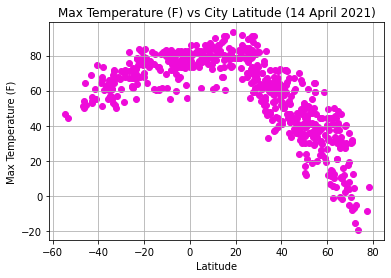

In [61]:
#creating the temp vs lat plot
plt.scatter(lat, temps, color="#ee0bd9")
#setting plot properties
plt.title("Max Temperature (F) vs City Latitude (14 April 2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

#save the figure as a png file
plt.savefig("output_data/overall_max_temp_vs_lat_14April2021.png")

plt.show()

This plot is showing the distribution of the maximum temperature for a city based on the latitude the city lays on. The maximum temperature for the city decreases as the city's latitude gets further away from the equator (0).

# Humidity (%) vs. Latitude

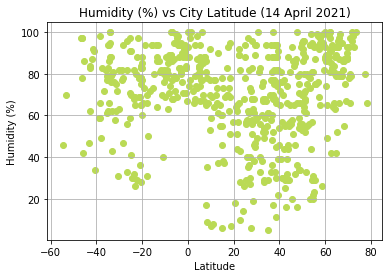

In [62]:
#creating the humidity vs lat plot
plt.scatter(lat, humids, color="#bada55")
#setting plot properties
plt.title("Humidity (%) vs City Latitude (14 April 2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

#save the figure as a png file
plt.savefig("output_data/overall_humidity_vs_lat_14April2021.png")

plt.show()

This plot is showing the distribution of the humidity percentage for a city based on the latitude the city lays on. On first glance, the humidity percentage doesn't appear to correlate to the latitude of the city for this day.

# Cloudiness (%) vs. Latitude

# Wind Speed (mph) vs. Latitude